# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [43]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

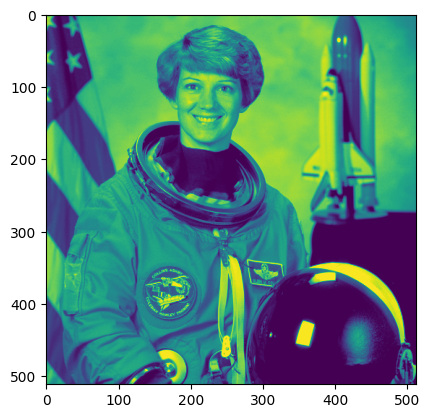

In [44]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [70]:
def prewitt_h(img_in):
    result = numpy.zeros(img_in.shape)
    size = 3
    n = (size - 1) // 2
    prewitt_h_mask = numpy.array([
                    [ -1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]
                ])
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] < n or p[0] >= (img_in.shape[0]- n) or p[1] < n or p[1] >= (img_in.shape[1]-n):
                result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img_in[p[0] - n+q[0], p[1] - n+q[1]] * prewitt_h_mask[q[0], q[1]]
                result[p] = neighborhood_sum / 6
    return result  
        
        
def prewitt_v(img_in):
    result = numpy.zeros(img_in.shape)
    size = 3
    n = (size - 1) // 2
    prewitt_v_mask = numpy.array([
                    [ -1, -1, -1],
                    [ 0, 0, 0],
                    [ 1, 1, 1]
                ])
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] < n or p[0] >= (img_in.shape[0]-n) or p[1] < n or p[1] >= (img_in.shape[1]-n):
                result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img_in[p[0] - n+q[0], p[1] - n+q[1]] * prewitt_v_mask[q[0], q[1]]
                result[p] = neighborhood_sum / 6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

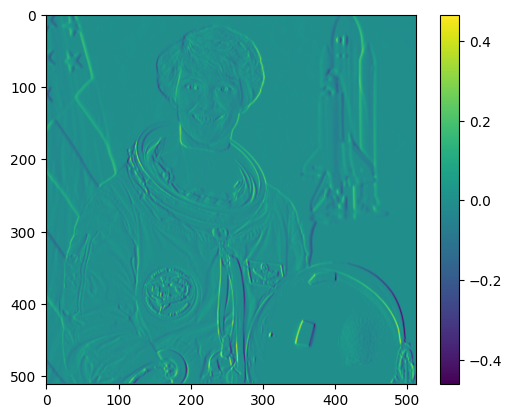

In [56]:
img1 = prewitt_h(img)
plt.imshow(img1)
plt.colorbar()

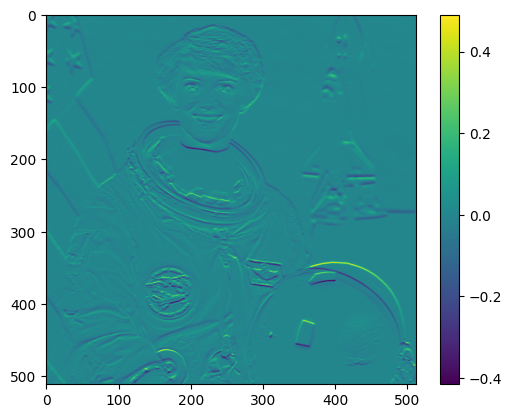

In [71]:
img2 = prewitt_v(img)
plt.imshow(img2)
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [64]:
import skimage.io
img3 = skimage.io.imread('data/astronaut_prewitt_h.tiff')
img4 = skimage.io.imread('data/astronaut_prewitt_v.tiff')

In [72]:
assert numpy.allclose(img1, img3)
assert numpy.allclose(img2, img4)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

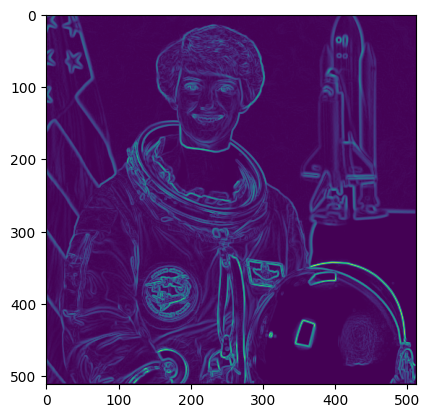

In [78]:
img_magnitude = numpy.sqrt(prewitt_h(img)**2 + prewitt_v(img)**2)
plt.imshow(img_magnitude)

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [79]:
img5 = skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert(numpy.allclose(img_magnitude, img5))

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: